Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [89]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### create a code to visualize one instance of all the nine classes present in the dataset

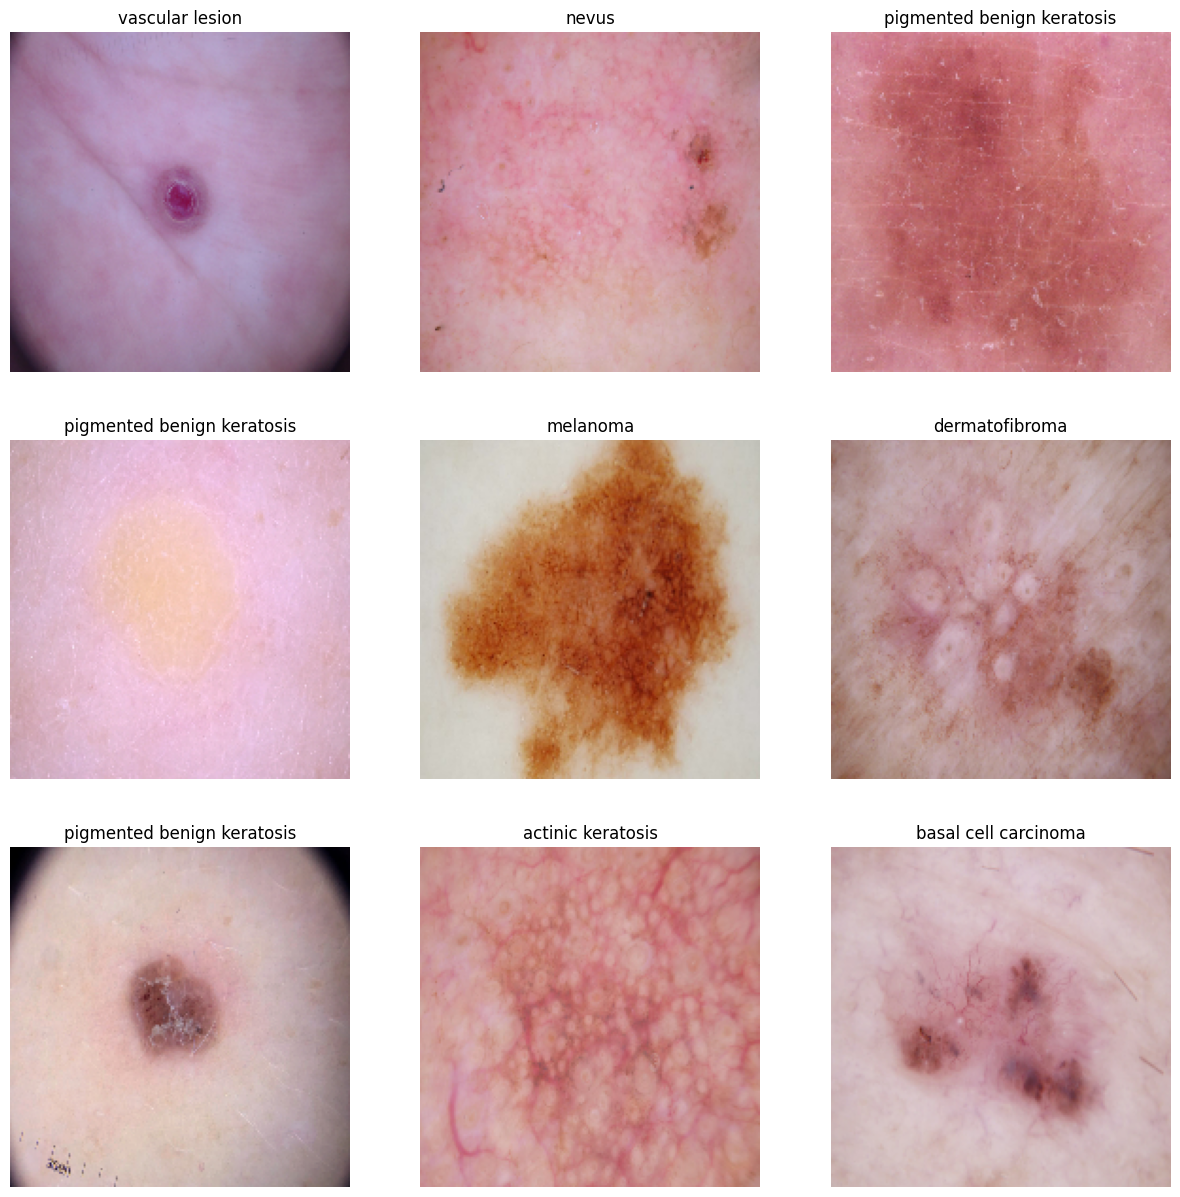

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [15]:
num_classes = 9 # As target class has 9 labels

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))





### Compile the model
Choose an appropirate optimiser and loss function for model training

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 26ms/step - loss: 1.9854 - accuracy: 0.2584 - val_loss: 1.7885 - val_accuracy: 0.4094
Epoch 2/20
56/56 [==============================] - 1s 19ms/step - loss: 1.6337 - accuracy: 0.4157 - val_loss: 1.4729 - val_accuracy: 0.5056
Epoch 3/20
56/56 [==============================] - 1s 19ms/step - loss: 1.4199 - accuracy: 0.5140 - val_loss: 1.4543 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 1s 19ms/step - loss: 1.2793 - accuracy: 0.5497 - val_loss: 1.3699 - val_accuracy: 0.5369
Epoch 5/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1906 - accuracy: 0.5670 - val_loss: 1.4606 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1417 - accuracy: 0.5949 - val_loss: 1.4704 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1038 - accuracy: 0.6144 - val_loss: 1.4635 - val_accuracy: 0.5235
Epoch 8/20
56

### Visualizing training results

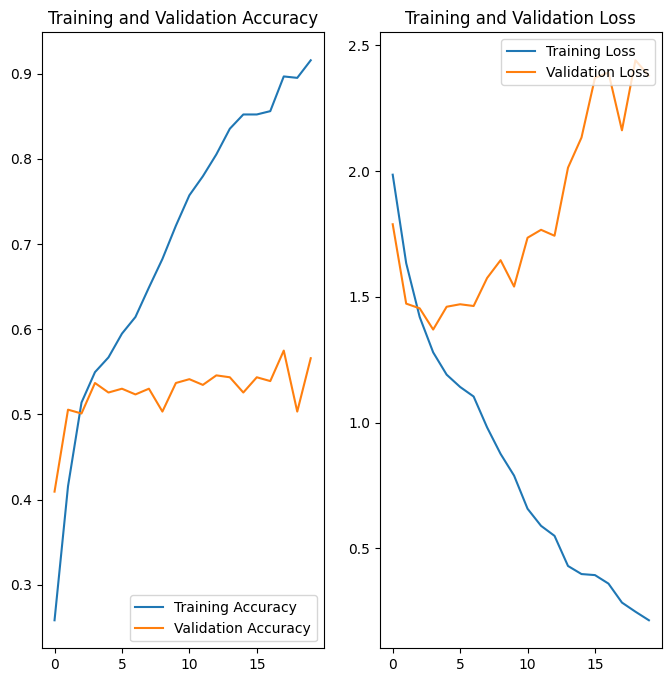

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit



1.   Shows a high training accuracy and low validation accuracy
2.   The model is highly overfitted
3.   Will use augementation and dropout to reduce the overfitting



### Write your findings here

In [20]:
augmentation = keras.Sequential([
                                layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                layers.experimental.preprocessing.RandomRotation(0.1),
                                layers.experimental.preprocessing.RandomZoom(0.1),
])


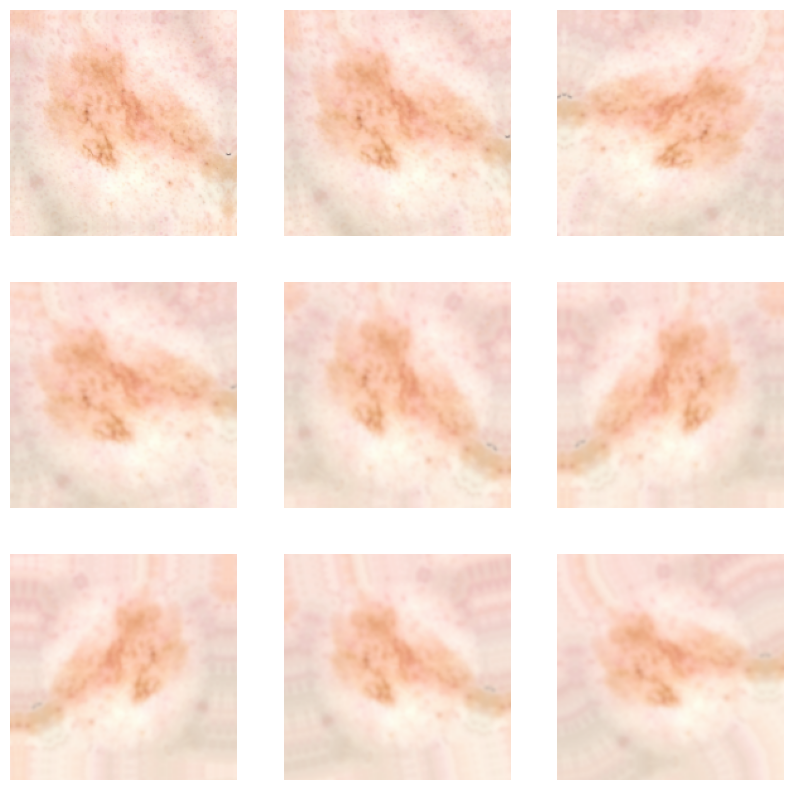

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    images = augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

### Create the model, compile and train the model


In [27]:
model = Sequential()
model.add(augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255))

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))


### Compiling the model

In [28]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [29]:
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 32ms/step - loss: 2.2677 - accuracy: 0.1797 - val_loss: 2.0466 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.9976 - accuracy: 0.2656 - val_loss: 1.8827 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.7819 - accuracy: 0.3544 - val_loss: 1.8695 - val_accuracy: 0.3535
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.7000 - accuracy: 0.3739 - val_loss: 1.5807 - val_accuracy: 0.4251
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.5937 - accuracy: 0.4369 - val_loss: 1.5541 - val_accuracy: 0.4676
Epoch 6/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5324 - accuracy: 0.4548 - val_loss: 1.6391 - val_accuracy: 0.4183
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5414 - accuracy: 0.4531 - val_loss: 1.4912 - val_accuracy: 0.4810
Epoch 8/20
56

### Visualizing the results

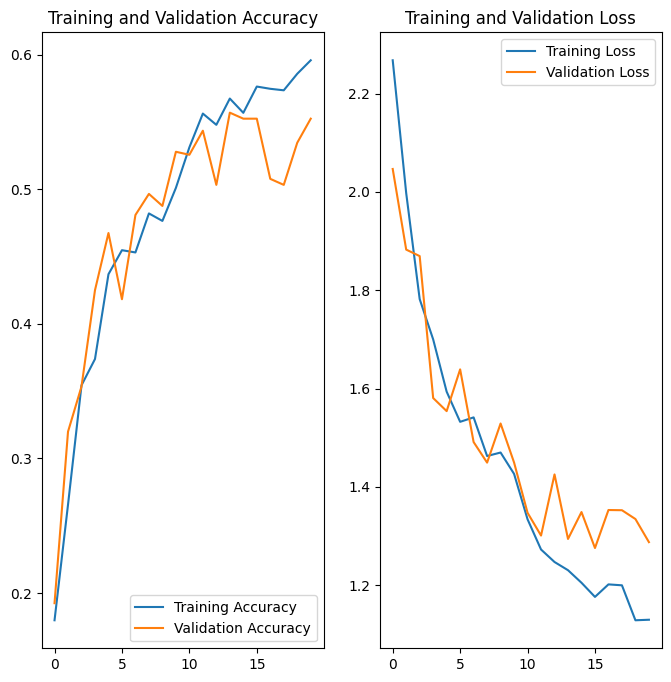

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



1.   Adding Augementaation and the dropout reduced the overfitting
2.   The accuracy is very low showing the signs of underfitting



#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [67]:
import pandas as pd
from pathlib import Path

data = []
for p in data_dir_train.iterdir():
  base_path = p.absolute()
  for i in p.iterdir():
    if i.name.endswith('.jpg'):
      data.append({
          'Path': str(base_path) + '/' + i.name,
          'Label': p.name
      })
original_df = pd.DataFrame(data, columns=['Path','Label'])
original_df.head()


,Path,Label
0,/content/drive/MyDrive/ML-C57/DL/CNN/case-stud...,seborrheic keratosis
1,/content/drive/MyDrive/ML-C57/DL/CNN/case-stud...,seborrheic keratosis
2,/content/drive/MyDrive/ML-C57/DL/CNN/case-stud...,seborrheic keratosis
3,/content/drive/MyDrive/ML-C57/DL/CNN/case-stud...,seborrheic keratosis
4,/content/drive/MyDrive/ML-C57/DL/CNN/case-stud...,seborrheic keratosis


In [68]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [69]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
Name: proportion, dtype: float64

#### - Which class has the least number of samples?
      "seborrheic keratosis" have least number(77) of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
      "pigmented benign keratosis" and "melanoma" have more samples in the training data with 20.63% and 19.56% respectively.


####  Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [55]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [70]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ADCF8EE4730>: 100%|██████████| 500/500 [00:18<00:00, 27.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7ADC51C371F0>: 100%|██████████| 500/500 [00:17<00:00, 28.04 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ADCF8E6C520>: 100%|██████████| 500/500 [00:20<00:00, 24.92 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7ADCF901E6B0>: 100%|██████████| 500/500 [01:25<00:00,  5.84 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7ADCF8FA27A0>: 100%|██████████| 500/500 [01:16<00:00,  6.51 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ADC51E5EC20>: 100%|██████████| 500/500 [00:18<00:00, 27.48 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7ADCF901F070>: 100%|██████████| 500/500 [00:39<00:00, 12.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7ADCF8F774C0>: 100%|██████████| 500/500 [00:17<00:00, 27.86 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/ML-C57/DL/CNN/case-study/cnn/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7ADC51C35090>: 100%|██████████| 500/500 [00:19<00:00, 25.56 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [71]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [72]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [73]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [74]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [77]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)
new_df.shape

(6739, 2)

In [78]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

In [79]:
new_df['Label'].value_counts(normalize=True)

Label
pigmented benign keratosis    0.142751
melanoma                      0.139190
basal cell carcinoma          0.129990
nevus                         0.127170
squamous cell carcinoma       0.101054
vascular lesion               0.094821
actinic keratosis             0.091111
dermatofibroma                0.088292
seborrheic keratosis          0.085621
Name: proportion, dtype: float64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [84]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [90]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [91]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

In [98]:
model = Sequential()
model.add(augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255))

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.20))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))


#### Compile your model (Choose optimizer and loss function appropriately)

In [99]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train your model

In [100]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 44s 240ms/step - loss: 1.8013 - accuracy: 0.3182 - val_loss: 1.5265 - val_accuracy: 0.4239
Epoch 2/30
169/169 [==============================] - 40s 232ms/step - loss: 1.4710 - accuracy: 0.4408 - val_loss: 1.3425 - val_accuracy: 0.5019
Epoch 3/30
169/169 [==============================] - 41s 235ms/step - loss: 1.3766 - accuracy: 0.4737 - val_loss: 1.3281 - val_accuracy: 0.5137
Epoch 4/30
169/169 [==============================] - 41s 237ms/step - loss: 1.3291 - accuracy: 0.4948 - val_loss: 1.3490 - val_accuracy: 0.4878
Epoch 5/30
169/169 [==============================] - 41s 235ms/step - loss: 1.2622 - accuracy: 0.5184 - val_loss: 1.1903 - val_accuracy: 0.5679
Epoch 6/30
169/169 [==============================] - 41s 237ms/step - loss: 1.1888 - accuracy: 0.5488 - val_loss: 1.2449 - val_accuracy: 0.5479
Epoch 7/30
169/169 [==============================] - 41s 237ms/step - loss: 1.1756 - accuracy: 0.5529 - val_loss: 1.1310 - val_ac

#### Visualize the model results

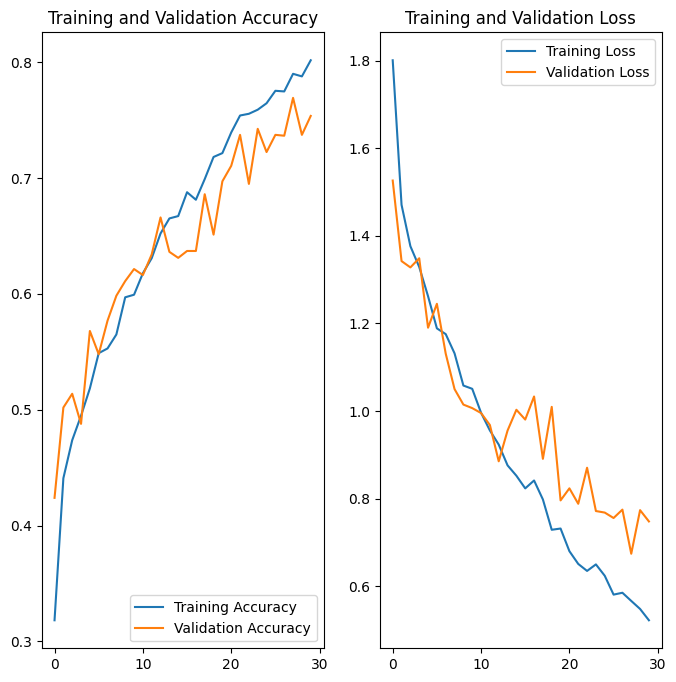

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?





1.   The final model shows no sign of overfitting/ underfitting
2.   The accuracy improved 80.16% and validation 75.35%

